In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
players = pd.read_csv("../data/fifa_22_player/players_22.csv")
players.head(2)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


In [3]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [4]:
players = players.dropna(subset=features)

In [5]:
data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


#### Steps
1. Scale the data
2. Randomly select centroids (means)
3. Assign each data points to their closed centroid
4. Updated the centroids of the newly formed clusters
5. Repeats steps 3 and 4 until the same centoids (convergences)

In [6]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [7]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
overall,19165.0,4.670472,1.346635,1.0,3.739130,4.717391,5.500000,10.0
potential,19165.0,5.319998,1.191076,1.0,4.521739,5.304348,6.086957,10.0
wage_eur,19165.0,1.219443,0.501528,1.0,1.012876,1.064378,1.193133,10.0
value_eur,19165.0,1.131826,0.353229,1.0,1.021620,1.044817,1.092370,10.0
age,19165.0,4.063345,1.575838,1.0,2.666667,4.000000,5.333333,10.0


In [8]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [9]:
# Getting one random centroid from the data
centroid = data.apply(lambda x: float(x.sample())) # float 
centroid

overall      2.565217
potential    2.760870
wage_eur     1.141631
value_eur    1.043657
age          2.000000
dtype: float64

In [10]:
# Randomly select centroids 
def random_centroids(data, K):
    centroids = []
    for k_i in range(K):
        centroid = data.apply(lambda x: float(x.sample())) # float 
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
    
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,4.130435,5.891304,4.521739,4.326087,6.478261
potential,6.086957,5.304348,6.869565,7.456522,6.673913
wage_eur,1.064378,1.373391,1.115880,1.038627,1.005150
value_eur,1.018140,1.020460,1.097010,2.136233,1.014660
age,5.666667,4.666667,3.666667,5.666667,5.333333


In [11]:
np.sqrt(((data - centroids.iloc[:, 0]) ** 2).sum(axis=1))

0        11.323845
1        11.022926
2         9.765522
3        11.081123
4        12.383106
           ...    
19234     6.096197
19235     5.748740
19236     5.840879
19237     5.644585
19238     5.644585
Length: 19165, dtype: float64

In [12]:
# Assign each data points to their closest centroid
def assign_cluster_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

cluster_labels = assign_cluster_labels(data, centroids)
cluster_labels[:10]

0    4
1    4
2    4
3    4
4    4
5    4
6    3
7    4
8    4
9    4
dtype: int64

In [13]:
for cluster_label, cluster_data_points in  data.groupby(cluster_labels):
    print(f"Cluster Name: {cluster_label}")
    print(f"Cluster {cluster_label} Data Points\n {cluster_data_points[:2]}\n")

Cluster Name: 0
Cluster 0 Data Points
        overall  potential  wage_eur  value_eur       age
3097  5.891304        5.5  1.141631   1.011181  8.666667
3101  5.891304        5.5  1.630901   1.011181  8.333333

Cluster Name: 1
Cluster 1 Data Points
       overall  potential  wage_eur  value_eur       age
807  7.065217   6.673913  1.502146   1.695491  2.666667
809  7.065217   6.673913  1.502146   1.672294  2.666667

Cluster Name: 2
Cluster 2 Data Points
       overall  potential  wage_eur  value_eur       age
387  7.652174   9.217391  2.300429   3.504853  1.666667
499  7.456522   9.021739  4.077253   3.156899  2.333333

Cluster Name: 3
Cluster 3 Data Points
     overall  potential  wage_eur  value_eur  age
6  9.608696       10.0  6.909871       10.0  3.0

Cluster Name: 4
Cluster 4 Data Points
      overall  potential  wage_eur  value_eur       age
0  10.000000   9.608696  9.227468   4.618307  7.000000
1   9.804348   9.413043  7.939914   6.543654  6.333333



In [14]:
# Updated the centroids of the newly formed clusters
def new_centroids(data, labels, K):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

new_centr = new_centroids(data, cluster_labels, 5)
new_centr

,0,1,2,3,4
overall,3.897728,5.044004,3.800252,9.608696,6.861909
potential,3.786037,4.942585,5.601750,10.000000,6.718914
wage_eur,1.048276,1.161069,1.085950,6.909871,1.808278
value_eur,1.016830,1.067913,1.069825,10.000000,1.527110
age,5.666112,4.610642,2.532872,3.000000,5.203922


In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [16]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

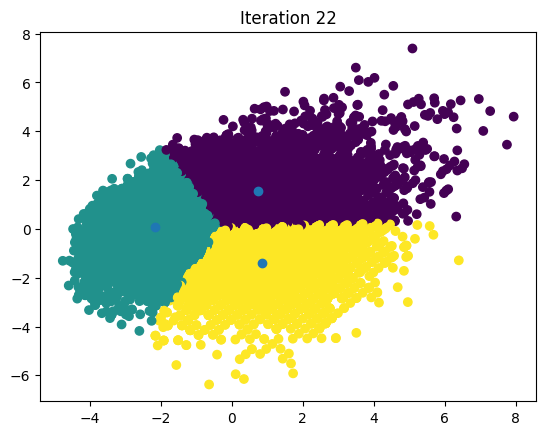

In [17]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()

iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = assign_cluster_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1


In [18]:
centroids

,0,1,2
overall,5.807503,3.205672,4.781960
potential,6.497870,4.930905,4.506813
wage_eur,1.420500,1.028564,1.118498
value_eur,1.285685,1.026655,1.044909
age,3.598215,2.514741,5.467648


In [19]:
labels.value_counts()

2    7191
1    6209
0    5765
Name: count, dtype: int64

In [20]:
players[labels==0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [21]:
centroids

,0,1,2
overall,5.807503,3.205672,4.781960
potential,6.497870,4.930905,4.506813
wage_eur,1.420500,1.028564,1.118498
value_eur,1.285685,1.026655,1.044909
age,3.598215,2.514741,5.467648


#### Putting all together

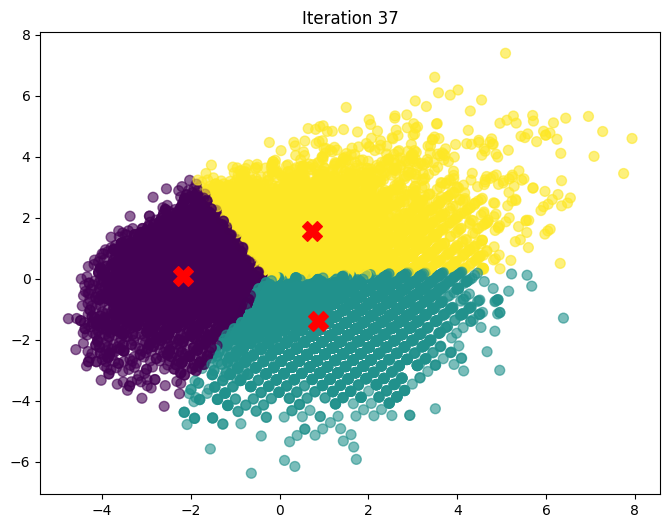

Converged!


In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

class KMeansCustom:
    def __init__(self, data, K, max_iters=100):
        self.data = self.scale_data(data)
        self.K = K
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None

    def scale_data(self, data):
        """Scale data to a range between 1 and 10."""
        return ((data - data.min()) / (data.max() - data.min())) * 9 + 1

    def initialize_centroids(self):
        """Randomly initialize centroids from the data."""
        centroids = [self.data.apply(lambda x: float(x.sample())) for _ in range(self.K)]
        self.centroids = pd.concat(centroids, axis=1)

    def assign_clusters(self):
        """Assign clusters based on the nearest centroid."""
        distances = self.centroids.apply(lambda x: np.sqrt(((self.data - x) ** 2).sum(axis=1)))
        self.labels = distances.idxmin(axis=1)

    def update_centroids(self):
        """Calculate new centroids by averaging points in each cluster."""
        self.centroids = self.data.groupby(self.labels).apply(lambda x: np.exp(np.log(x).mean())).T

    def plot_clusters(self, iteration):
        """Visualize the clusters with PCA-reduced data."""
        pca = PCA(n_components=2)
        data_2d = pca.fit_transform(self.data)
        centroids_2d = pca.transform(self.centroids.T)
        
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        plt.title(f'Iteration {iteration}')
        plt.scatter(data_2d[:, 0], data_2d[:, 1], c=self.labels, cmap='viridis', s=50, alpha=0.6)
        plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200)
        plt.show()

    def fit(self):
        """Run the KMeans algorithm until convergence or max iterations."""
        self.initialize_centroids()
        for iteration in range(1, self.max_iters + 1):
            old_centroids = self.centroids.copy()
            self.assign_clusters()
            self.update_centroids()
            
            self.plot_clusters(iteration)
            
            if old_centroids.equals(self.centroids):
                print("Converged!")
                break

    def get_centroids(self):
        """Returns the current centroids."""
        return self.centroids

# Usage example
k = 3
max_iterations = 100

kmeans_custom = KMeansCustom(data, K=k, max_iters=max_iterations)
kmeans_custom.fit()


In [23]:
# Retrieve centroids after fitting
centroids_custom = kmeans_custom.get_centroids()
print(f"Final centroids:\n {pd.DataFrame(centroids_custom)}")

Final centroids:
                   0         1         2
overall    3.206838  4.784633  5.806043
potential  4.928473  4.506962  6.497993
wage_eur   1.028505  1.118904  1.420001
value_eur  1.026614  1.044980  1.285501
age        2.518708  5.472247  3.596161


#### Comparing with Sci-kit learn

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [25]:
kmeans.cluster_centers_

array([[3.60094482, 5.20669732, 1.03996864, 1.03584235, 2.71264957],
       [4.80118697, 4.50415275, 1.11296868, 1.0400259 , 5.60917617],
       [6.23265408, 6.62436689, 1.65785175, 1.41413476, 4.14091858]])

In [26]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,3.600945,4.801187,6.232654
potential,5.206697,4.504153,6.624367
wage_eur,1.039969,1.112969,1.657852
value_eur,1.035842,1.040026,1.414135
age,2.712650,5.609176,4.140919


In [27]:
centroids_custom = kmeans_custom.get_centroids()
pd.DataFrame(centroids_custom)

,0,1,2
overall,3.206838,4.784633,5.806043
potential,4.928473,4.506962,6.497993
wage_eur,1.028505,1.118904,1.420001
value_eur,1.026614,1.044980,1.285501
age,2.518708,5.472247,3.596161


In [28]:
centroids

,0,1,2
overall,5.807503,3.205672,4.781960
potential,6.497870,4.930905,4.506813
wage_eur,1.420500,1.028564,1.118498
value_eur,1.285685,1.026655,1.044909
age,3.598215,2.514741,5.467648


### How to choose No. of clusters $k$?
#### Elbow method

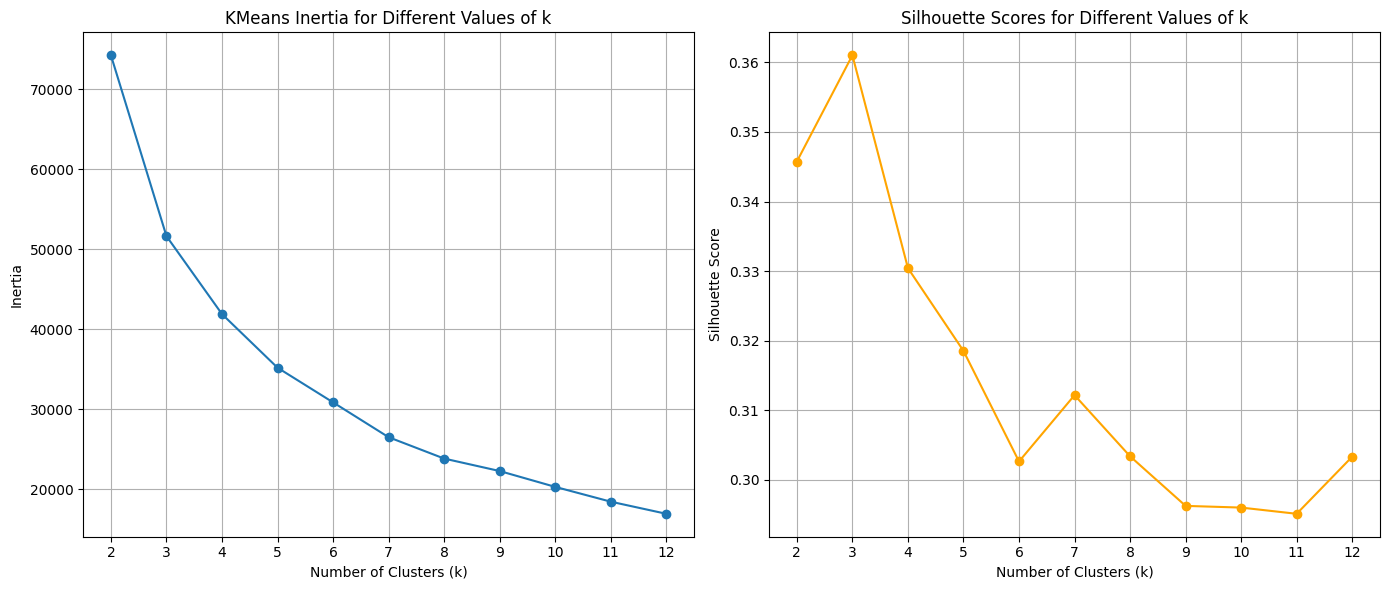

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
max_k = 12
inertia = []
silhoutte_scores = []
k_values = range(2, max_k+1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(data)

    sil_score = silhouette_score(data, cluster_labels)

    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()